In [2]:
#I Wayan Krisna Gita Santika 1301170109

In [3]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Open data CSV
df = pd.read_csv("fifa20_resultexploration.csv")

pd.set_option('display.max_rows', None)

# #Checking validation data with see the first 10
df.head()

,Unnamed: 0,pace,shooting,passing,dribbling,attacking_finishing,attacking_heading_accuracy,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,mentality_positioning,mentality_composure,midfield_pos
0,0,87.000000,92.000000,92.000000,96.000000,95,70,96,91,84,93,94,96,1
1,1,90.000000,93.000000,82.000000,89.000000,94,89,92,89,91,87,95,95,1
2,2,91.000000,85.000000,87.000000,95.000000,87,62,95,94,89,96,87,94,1
3,3,67.700899,52.298301,57.233777,62.531585,11,15,30,43,60,67,11,68,1
4,4,91.000000,83.000000,86.000000,94.000000,84,61,94,94,88,95,87,91,1


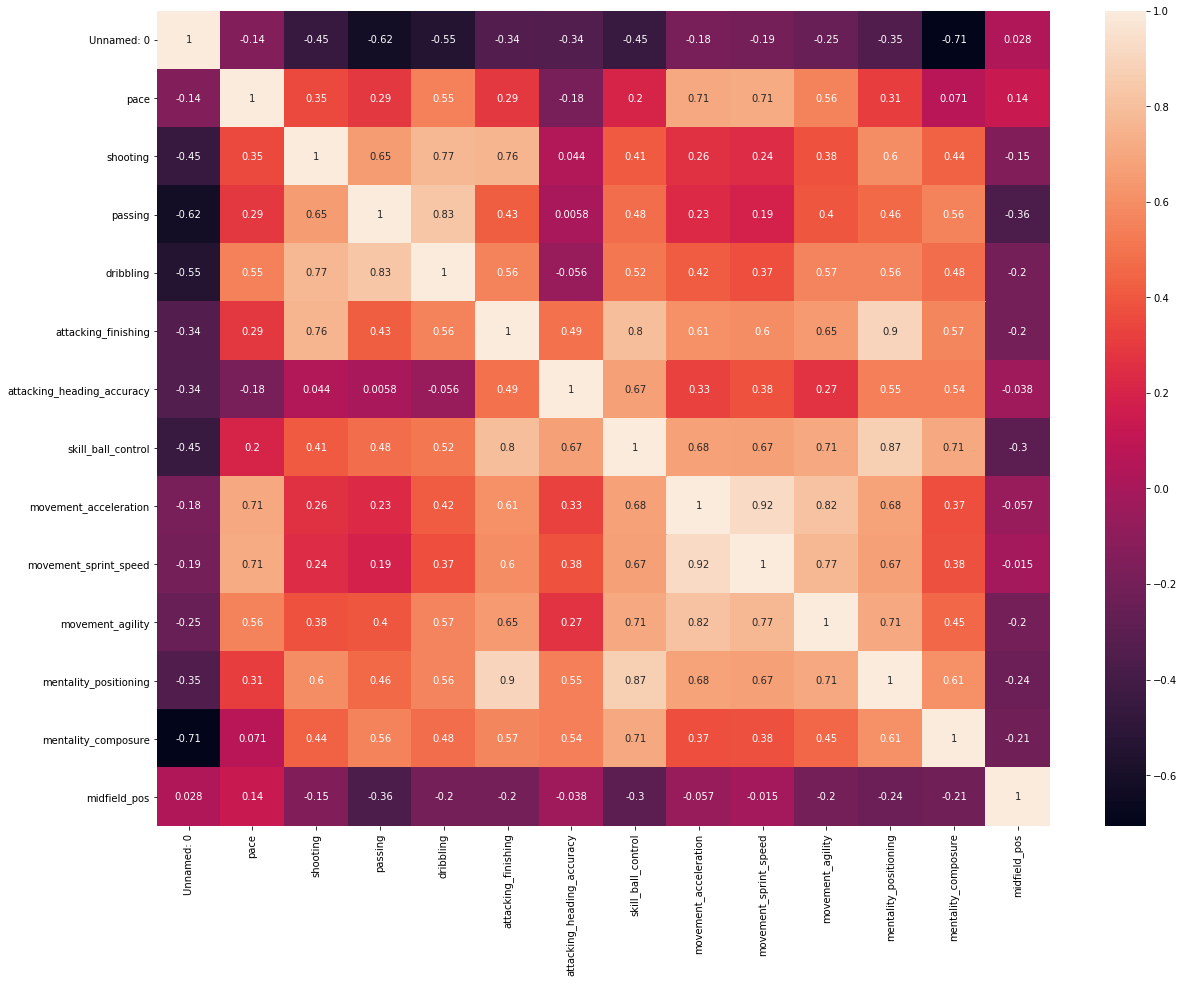

In [9]:
#Print Heatmap to know the Correlation between Column
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)